Chapter 18  
# Support Vector Machine 
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

## Create 20 sample points

In [5]:
X = np.array([[0,2],[2,0],[4.5,0],[4.5,3],[3,4.5],
              [2,1],[1.5,3],[4,4],[0,3.5],[3,2.5],
              [-1,-1],[-3,-4.5],[-2,-3],[-4,-4],[0,-2.5],
              [-1,-3.5],[-3.5,-1],[0,-3.5],[-3,-1],[-4,0]])
y = [1] * 10 + [-1] * 10  # first 10 points class 1, last 10 points class -1

## Train linear SVM and visualize decision boundary for different penalty parameters

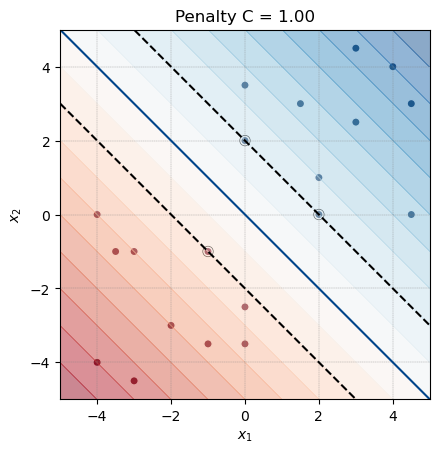

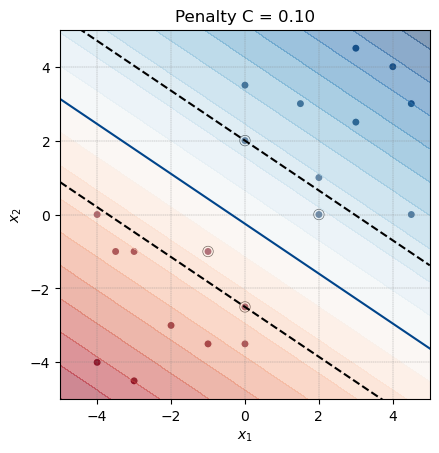

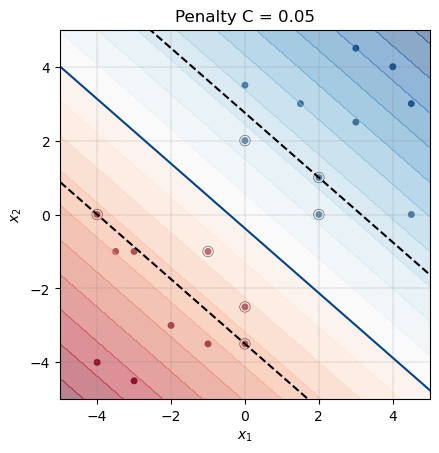

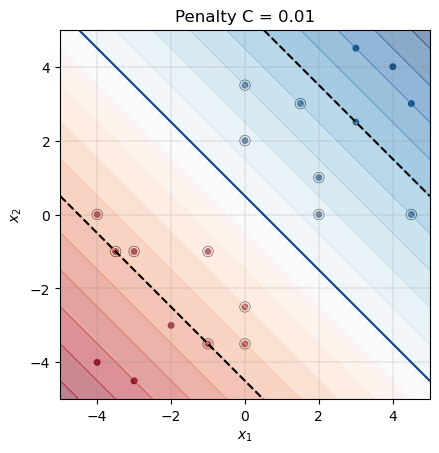

In [15]:
for penalty in (1, 0.1, 0.05, 0.01):
    clf = svm.SVC(kernel='linear', C=penalty)  # initialize linear SVM with penalty C
    clf.fit(X, y)  # fit the model to the data

    ## Extract SVM decision boundary parameters
    w = clf.coef_[0]  # weight vector
    w1, w2 = w[0], w[1]
    b = clf.intercept_[0]  # bias term

    ## Compute decision boundary and margin lines
    x1_vec = np.linspace(-5, 5)  # range for x1
    x2_decision = -w1/w2 * x1_vec - b/w2  # decision boundary line
    x2_up = -w1/w2 * x1_vec - (b - 1)/w2  # upper margin line
    x2_down = -w1/w2 * x1_vec - (b + 1)/w2  # lower margin line

    ## Visualization
    fig, ax = plt.subplots()
    plt.plot(x1_vec, x2_decision, color=np.array([0, 68, 138])/255.)  # decision boundary
    plt.plot(x1_vec, x2_down, 'k--')  # lower margin
    plt.plot(x1_vec, x2_up, 'k--')  # upper margin
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                s=50, facecolors='none', edgecolors='k')  # support vectors
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='w')  # data points

    ## Meshgrid for background decision function
    x_1_2_min, x_1_2_max = -5, 5
    YY, XX = np.meshgrid(x1_vec, x1_vec)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    cnt = plt.contourf(XX, YY, Z, levels=20, cmap='RdBu', alpha=0.5, linestyles=None)
    # for c in cnt.collections:
    #     c.set_edgecolor("face")

    ## Axis settings
    plt.axis('scaled')
    ax.set_xlim(x_1_2_min, x_1_2_max)
    ax.set_ylim(x_1_2_min, x_1_2_max)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.xticks(np.arange(x_1_2_min+1, x_1_2_max+1, 2))
    plt.yticks(np.arange(x_1_2_min+1, x_1_2_max+1, 2))
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    plt.title("Penalty C = {:.2f}".format(penalty))